# Project 4 - Part 1: Movie Recommendation System Using Model Based Collaborative Filtering

- Nikita Mandhan

#### Importing Necessary Libraries

In [1]:
# Importing libraries for data handling, numerical operations, and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

In [2]:
df_movies = pd.read_csv('movies.csv')

In [3]:
df_ratings = pd.read_csv('ratings.csv')

In [4]:
df_links = pd.read_csv('links.csv')

In [5]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [6]:
df_ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [7]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


#### Merge Movies and Ratings Data


In [8]:
# Merging movies and ratings dataframes on 'movieId'
df_merged = pd.merge(df_ratings, df_movies, on='movieId')

# Selecting relevant columns for the merged dataframe
df_merged = df_merged[['userId', 'movieId', 'title', 'genres', 'rating', 'timestamp']]

In [9]:
df_merged

,userId,movieId,title,genres,rating,timestamp
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,1147880044
1,3,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,1439474476
2,4,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,1573938898
3,5,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,830786155
4,7,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,835444730
...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden (1986),(no genres listed),2.0,1553453039
25000091,162358,200194,Tough Luck (2004),Action|Adventure|Thriller,2.0,1553453843
25000092,162386,139970,I Don't Speak English (1995),Comedy,3.5,1549215965
25000093,162386,200726,The Graduates (1995),Children|Drama,4.0,1554651417


#### Merge with Links Data and Drop Unnecessary Columns

In [10]:
# Further merging with the links dataframe to add IMDb IDs
df_merged = pd.merge(df_merged, df_links, on='movieId')

In [11]:
# Dropping unnecessary columns ('timestamp', 'tmdbId')
df_merged = df_merged.drop(['timestamp', 'tmdbId'], axis=1)

In [12]:
df_merged

,userId,movieId,title,genres,rating,imdbId
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,110912
1,3,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,110912
2,4,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
3,5,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
4,7,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden (1986),(no genres listed),2.0,91087
25000091,162358,200194,Tough Luck (2004),Action|Adventure|Thriller,2.0,376263
25000092,162386,139970,I Don't Speak English (1995),Comedy,3.5,113436
25000093,162386,200726,The Graduates (1995),Children|Drama,4.0,113623


In [13]:
#df_merged.to_csv('movie_lens_data.csv', index=False)

Save the combined dataframe in .csv format. Since this is already done, the above code block is commented.

### Data Preprocessing


In [14]:
df = pd.read_csv('movie_lens_data.csv')

In [15]:
df

,userId,movieId,title,genres,rating,imdbId
0,1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,110912
1,3,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,5.0,110912
2,4,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
3,5,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
4,7,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.0,110912
...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden (1986),(no genres listed),2.0,91087
25000091,162358,200194,Tough Luck (2004),Action|Adventure|Thriller,2.0,376263
25000092,162386,139970,I Don't Speak English (1995),Comedy,3.5,113436
25000093,162386,200726,The Graduates (1995),Children|Drama,4.0,113623


In [16]:
# Extracting the year from the movie title and creating a new column
df['year'] = df['title'].str.extract(r'\((\d{4})\)')

# Removing the year from the 'title' column and trimming extra spaces
df['title'] = df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

<ipython-input-16-c9dec4e61047>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace(r'\(\d{4}\)', '').str.strip()


In [17]:
# Reorganizing columns for better readability
df = df[['userId', 'movieId', 'title', 'year', 'genres', 'rating', 'imdbId']]
df

,userId,movieId,title,year,genres,rating,imdbId
0,1,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,5.0,110912
1,3,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,5.0,110912
2,4,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,4.0,110912
3,5,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,4.0,110912
4,7,296,Pulp Fiction,1994,Comedy|Crime|Drama|Thriller,4.0,110912
...,...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden,1986,(no genres listed),2.0,91087
25000091,162358,200194,Tough Luck,2004,Action|Adventure|Thriller,2.0,376263
25000092,162386,139970,I Don't Speak English,1995,Comedy,3.5,113436
25000093,162386,200726,The Graduates,1995,Children|Drama,4.0,113623


In [18]:
# Replacing the pipe '|' with a comma ',' in the genres column
df['genres'] = df['genres'].str.replace('|', ',', regex=False)
df

,userId,movieId,title,year,genres,rating,imdbId
0,1,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
1,3,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
2,4,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
3,5,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
4,7,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
...,...,...,...,...,...,...,...
25000090,162358,200192,Den frusna leoparden,1986,(no genres listed),2.0,91087
25000091,162358,200194,Tough Luck,2004,"Action,Adventure,Thriller",2.0,376263
25000092,162386,139970,I Don't Speak English,1995,Comedy,3.5,113436
25000093,162386,200726,The Graduates,1995,"Children,Drama",4.0,113623


#### Dataframe Summary


In [19]:
# Display the dimensions of the dataframe
print("Dimension of the dataframe is",df.shape)

Dimension of the dataframe is (25000095, 7)


In [20]:
# Display a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   title    object 
 3   year     object 
 4   genres   object 
 5   rating   float64
 6   imdbId   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ GB


In [21]:
#count the number of null values in each column
df.isnull().sum()

userId         0
movieId        0
title          0
year       11740
genres         0
rating         0
imdbId         0
dtype: int64

#### Data Type Analysis


In [22]:
# Identifying columns based on their data types

#columns with float values
float_columns = df.columns[df.dtypes==np.float64].tolist()

#columns with object values
object_columns = df.columns[df.dtypes==object].tolist()

#columns with numeric values
numeric_columns = df.columns[df.dtypes==np.int64].tolist()

print("Number of columns with float values: ", len(float_columns))
print('\n')
print("The columns are:", float_columns)
print('\n')
print("-----------------------------------------------------------------------------------------------------------------")
print('\n')
print("Number of columns with numeric values: ", len(numeric_columns))
print('\n')
print("The columns are:", numeric_columns)
print('\n')
print("-----------------------------------------------------------------------------------------------------------------")
print('\n')
print("Number of columns with object values: ", len(object_columns))
print('\n')
print("The columns are:", object_columns)
print('\n')
print("-----------------------------------------------------------------------------------------------------------------")
print('\n')

Number of columns with float values:  1


The columns are: ['rating']


-----------------------------------------------------------------------------------------------------------------


Number of columns with numeric values:  3


The columns are: ['userId', 'movieId', 'imdbId']


-----------------------------------------------------------------------------------------------------------------


Number of columns with object values:  3


The columns are: ['title', 'year', 'genres']


-----------------------------------------------------------------------------------------------------------------




In [23]:
#Summary statistics for all float columns
float_values_summary = df[float_columns].describe().transpose()
float_values_summary = float_values_summary.rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Standard Deviation', 'min':'Minimum','max':'Maximum'})
float_values_summary

,Count,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum
rating,25000095.0,3.533854,1.060744,0.5,3.0,3.5,4.0,5.0


In [24]:
#Summary statistics for all numeric columns
numeric_values_summary = df[numeric_columns].describe().transpose()
numeric_values_summary = numeric_values_summary.rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Standard Deviation', 'min':'Minimum','max':'Maximum'})
numeric_values_summary

,Count,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum
userId,25000095.0,81189.281154,46791.715897,1.0,40510.0,80914.0,121557.0,162541.0
movieId,25000095.0,21387.981943,39198.862101,1.0,1196.0,2947.0,8623.0,209171.0
imdbId,25000095.0,395565.283590,766669.443597,1.0,99088.0,118617.0,318462.0,11170942.0


In [25]:
#Summary statistics for all string variables
obj_values_summary = df[object_columns].describe().transpose()
obj_values_summary = obj_values_summary.rename(columns={'count': 'Count', 'unique': 'Unique', 'top': 'Top', 'freq': 'Frequency'})
obj_values_summary

,Count,Unique,Top,Frequency
title,25000095,55463,Forrest Gump,81491
year,24988355,135,1995,1497480
genres,25000095,1621,Drama,1765705


In [26]:
max_min_numeric_columns = pd.DataFrame(columns = ['Column Name','Maximum Value', 'Minimum Value'])
#finding the maximum and minimum values in every numeric column
for column in numeric_columns:
    maxi = df[column].max()
    mini = df[column].min()
    temp_df = pd.DataFrame({"Column Name": [column], "Maximum Value": [maxi], "Minimum Value": [mini]})
    max_min_numeric_columns = pd.concat([max_min_numeric_columns, temp_df], ignore_index=True)  
    
max_min_numeric_columns

,Column Name,Maximum Value,Minimum Value
0,userId,162541,1
1,movieId,209171,1
2,imdbId,11170942,1


In [27]:
max_min_float_columns = pd.DataFrame(columns = ['Column Name','Maximum Value', 'Minimum Value'])
#finding the maximum and minimum values in every float column
for column in float_columns:
    maxi = df[column].max()
    mini = df[column].min()
    temp_df = pd.DataFrame({"Column Name": [column], "Maximum Value": [maxi], "Minimum Value": [mini]})
    max_min_float_columns = pd.concat([max_min_float_columns, temp_df], ignore_index=True)
    
max_min_float_columns

,Column Name,Maximum Value,Minimum Value
0,rating,5.0,0.5


In [28]:
#number of unique values in each column of the dataframe
for col in df.columns:
    print(f'The number of unique values in {col}:',len(df[col].unique()))
    #If the number of unique values is equal to the number of rows, the column can be dropped as it does not provide any useful information.
    if len(df[col].unique())==len(df):
        print(f'This {col} can be dropped')

The number of unique values in userId: 162541
The number of unique values in movieId: 59047
The number of unique values in title: 55463
The number of unique values in year: 136
The number of unique values in genres: 1621
The number of unique values in rating: 10
The number of unique values in imdbId: 59047


#### Subsetting Data for Further processing

In [29]:
unique_user_ids = df['userId'].unique()[:45000]
df = df[df['userId'].isin(unique_user_ids)]

The original dataset contains approximately 25 million records, which is quite large and may pose computational challenges, especially for resource-intensive machine learning models.To make the dataset more manageable and ensure that the analysis is computationally feasible with the available resources, we subset the data to include only the first 45,000 unique users. This reduces the dataset size to around 10 million records, which is more practical for processing.

In [30]:
df

,userId,movieId,title,year,genres,rating,imdbId
0,1,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
1,3,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",5.0,110912
2,4,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
3,5,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
4,7,296,Pulp Fiction,1994,"Comedy,Crime,Drama,Thriller",4.0,110912
...,...,...,...,...,...,...,...
24995011,91630,128362,Burn Paris Burn,2009,"Animation,Fantasy,Mystery",3.5,1379057
24995015,91630,140419,The Invisible Boy,1957,"Adventure,Children,Comedy,Sci-Fi",2.5,50546
24995023,91776,145246,Fist of Fury 1991,1991,"Action,Comedy",3.5,103296
24995027,91776,172221,School for Seduction,2004,"Comedy,Drama,Romance",2.5,368249


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10300127 entries, 0 to 24995029
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   title    object 
 3   year     object 
 4   genres   object 
 5   rating   float64
 6   imdbId   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 628.7+ MB


In [32]:
vis_df = df.copy()

The dataframe will be solely used for visualisation purposes.

In [33]:
vis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10300127 entries, 0 to 24995029
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   title    object 
 3   year     object 
 4   genres   object 
 5   rating   float64
 6   imdbId   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 628.7+ MB


#### Exploratory Data Analysis

##### 1) Distribution of Movie Ratings


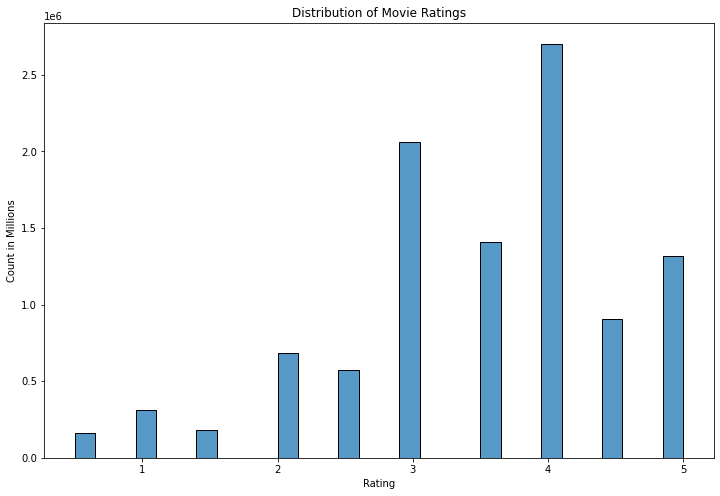

In [34]:
plt.figure(figsize=(12, 8))
sns.histplot(vis_df['rating'], bins=30, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count in Millions')
plt.show()

**Insight**: The histogram shows a preference for higher movie ratings, with 4 being the most common, suggesting users generally rate movies positively.  Lower ratings(1 and 2) are less frequent, which could imply a tendency to watch and rate movies that users expect to like.

##### 2) Number of Movies in Each Genre


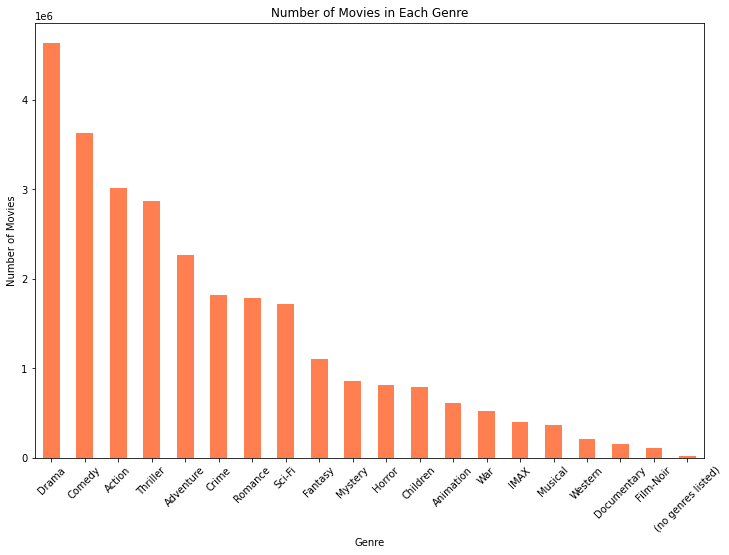

In [35]:
genre_counts = vis_df['genres'].str.split(',', expand=True).stack().value_counts()

plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='coral')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

**Insight:** 
Drama is the most prevalent genre, followed by Comedy, suggesting these genres are widely produced and possibly popular among viewers. Less represented genres like Documentary and Horror indicate niche markets or selective production.

##### 3) Rating Distribution Across Genres


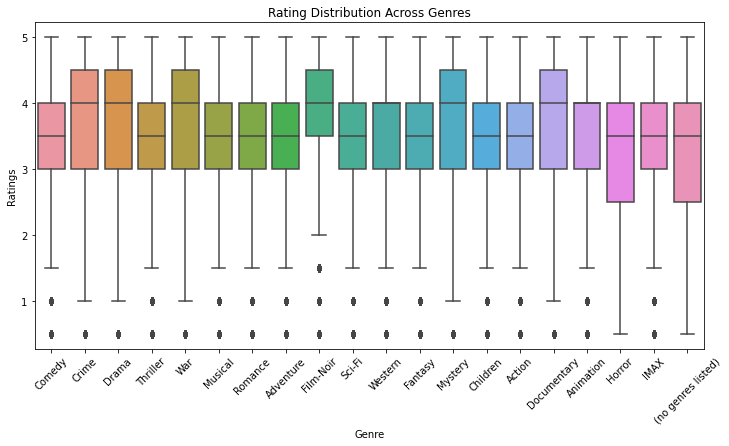

In [36]:
# Splitting genres into a list for analysis
vis_df['genres'] = vis_df['genres'].apply(lambda x: x.split(','))

# Preparing data for visualization
genre_rating_df = vis_df.explode('genres')
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='rating', data=genre_rating_df)
plt.title('Rating Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()

**Insight**: The boxplot distribution indicates that median ratings across genres are fairly consistent, typically around 3 to 4, suggesting a general satisfaction with movies across different genres.

##### 4) Average Rating per Genre


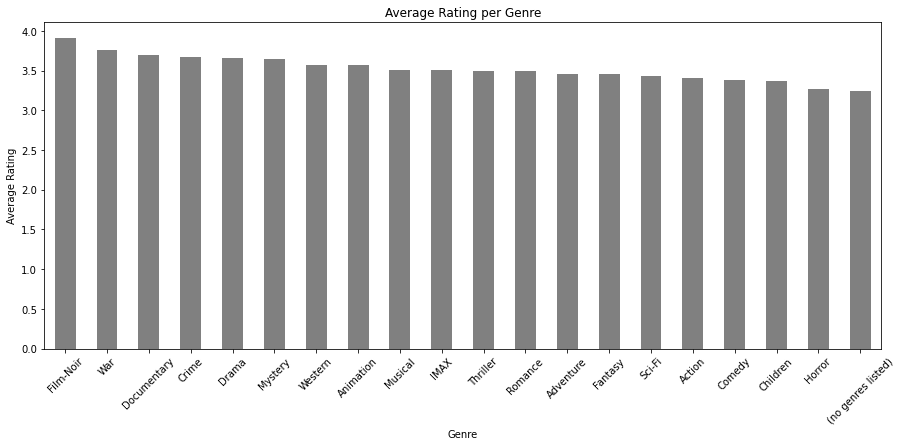

In [37]:
# Recalculating genre_rating_df as it was modified earlier
genre_rating_df = vis_df.explode('genres')
avg_genre_rating = genre_rating_df.groupby('genres')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
avg_genre_rating.plot(kind='bar', color='gray')
plt.title('Average Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**Insight**:
The bar chart shows that average ratings for movies across various genres are relatively close, with most genres receiving an average rating above 3.5, indicating a general positive reception across the board.

##### 5) Top 10 Most Rated Movies


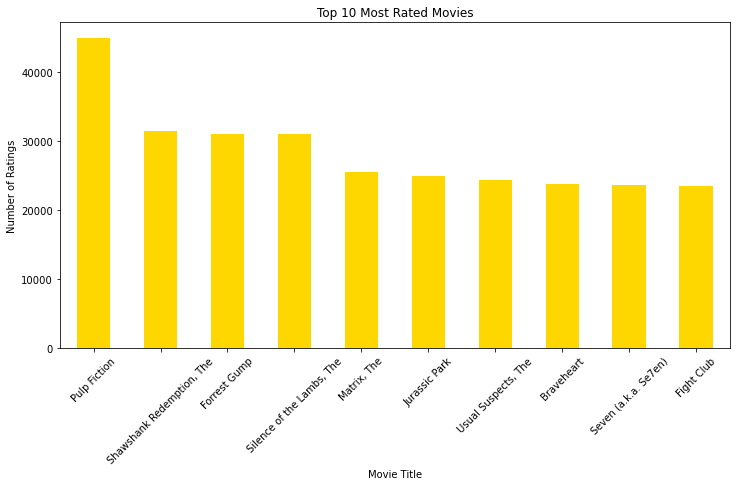

In [38]:
# Counting number of ratings for each movie
movie_popularity = vis_df['title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
movie_popularity.plot(kind='bar', color='gold')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

**Insight**: 
The bar chart highlights "Pulp Fiction" as the most rated movie, indicating its popularity and high engagement among viewers within this dataset.

##### 6) Number of Movies Released Each Year


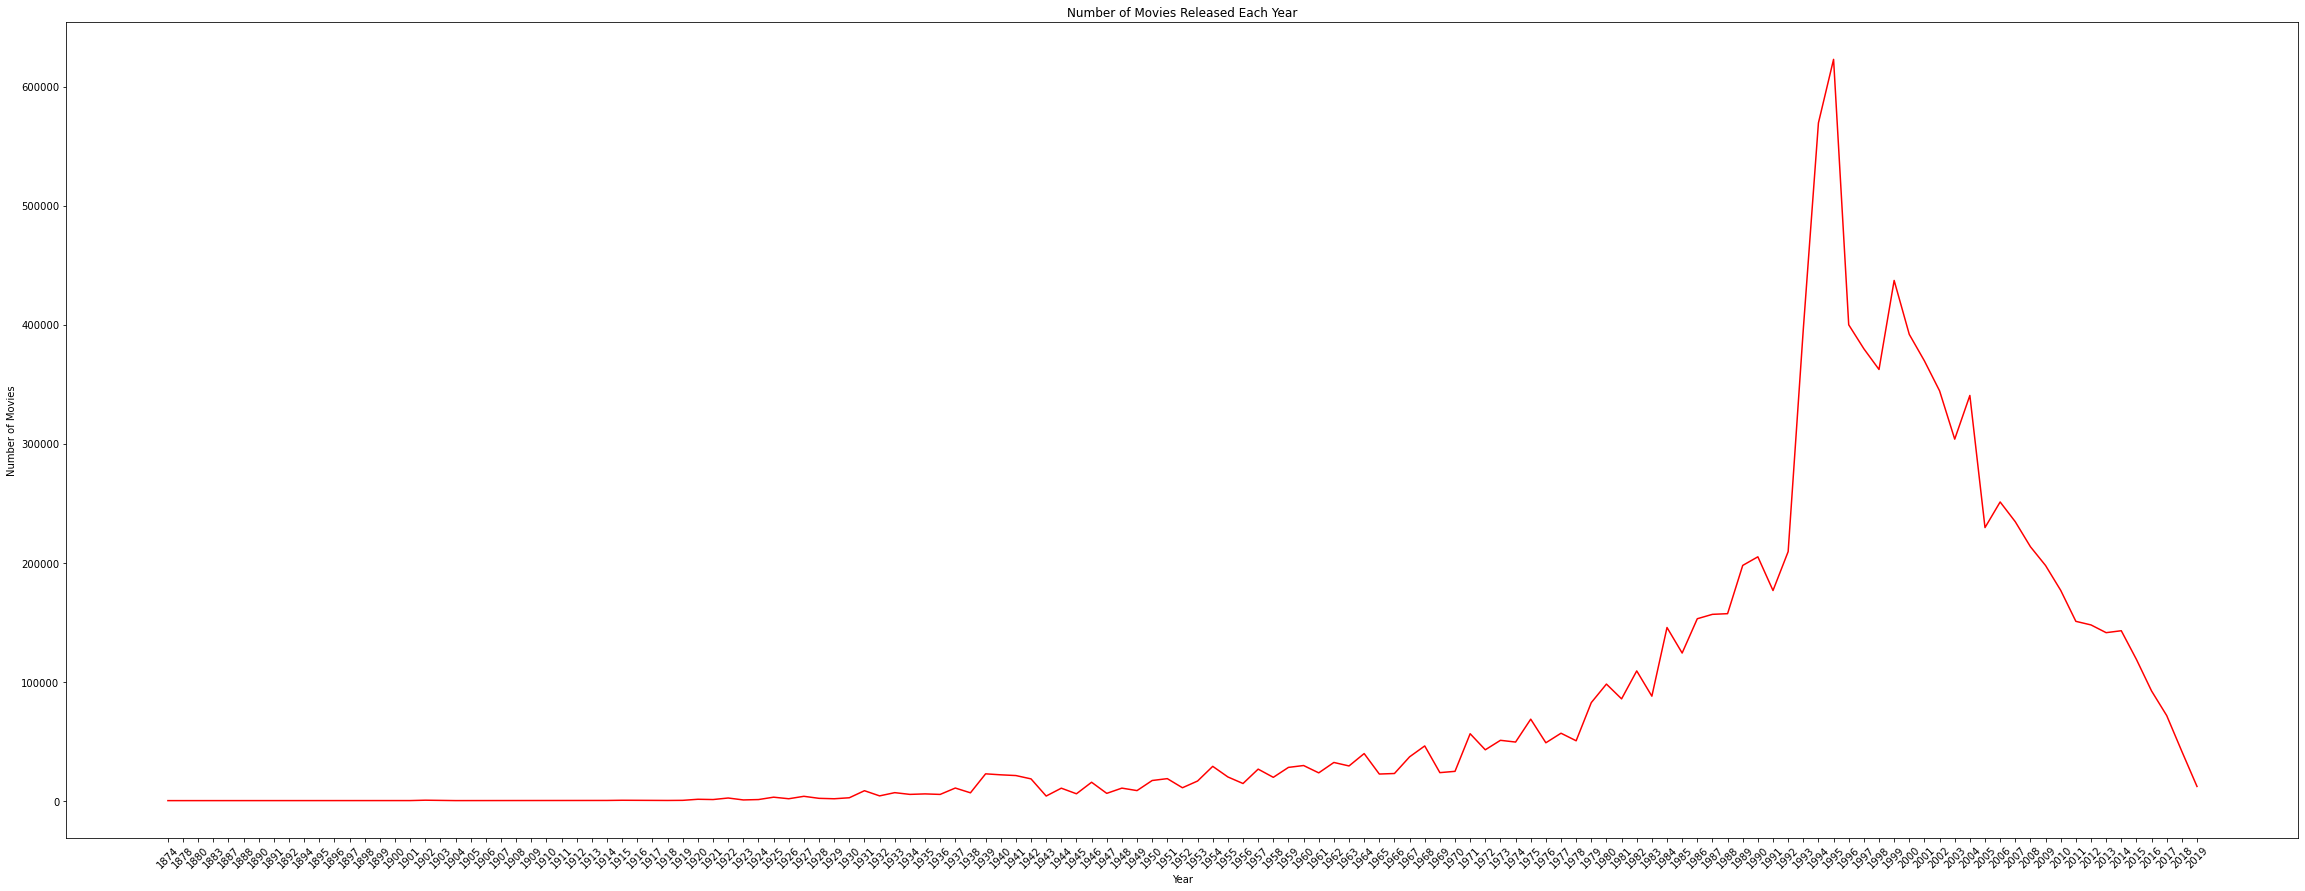

In [39]:
year_counts = vis_df['year'].value_counts().sort_index()

plt.figure(figsize=(40, 15))
sns.lineplot(x=year_counts.index, y=year_counts.values, color='red')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

**Insight**:
The line graph depicts a significant peak suggesting a year with a remarkably high number of movies released, followed by a sharp decline, which could indicate a period of reduced movie production or changes in data collection.

##### 7) Trend of Average Movie Ratings Over Years

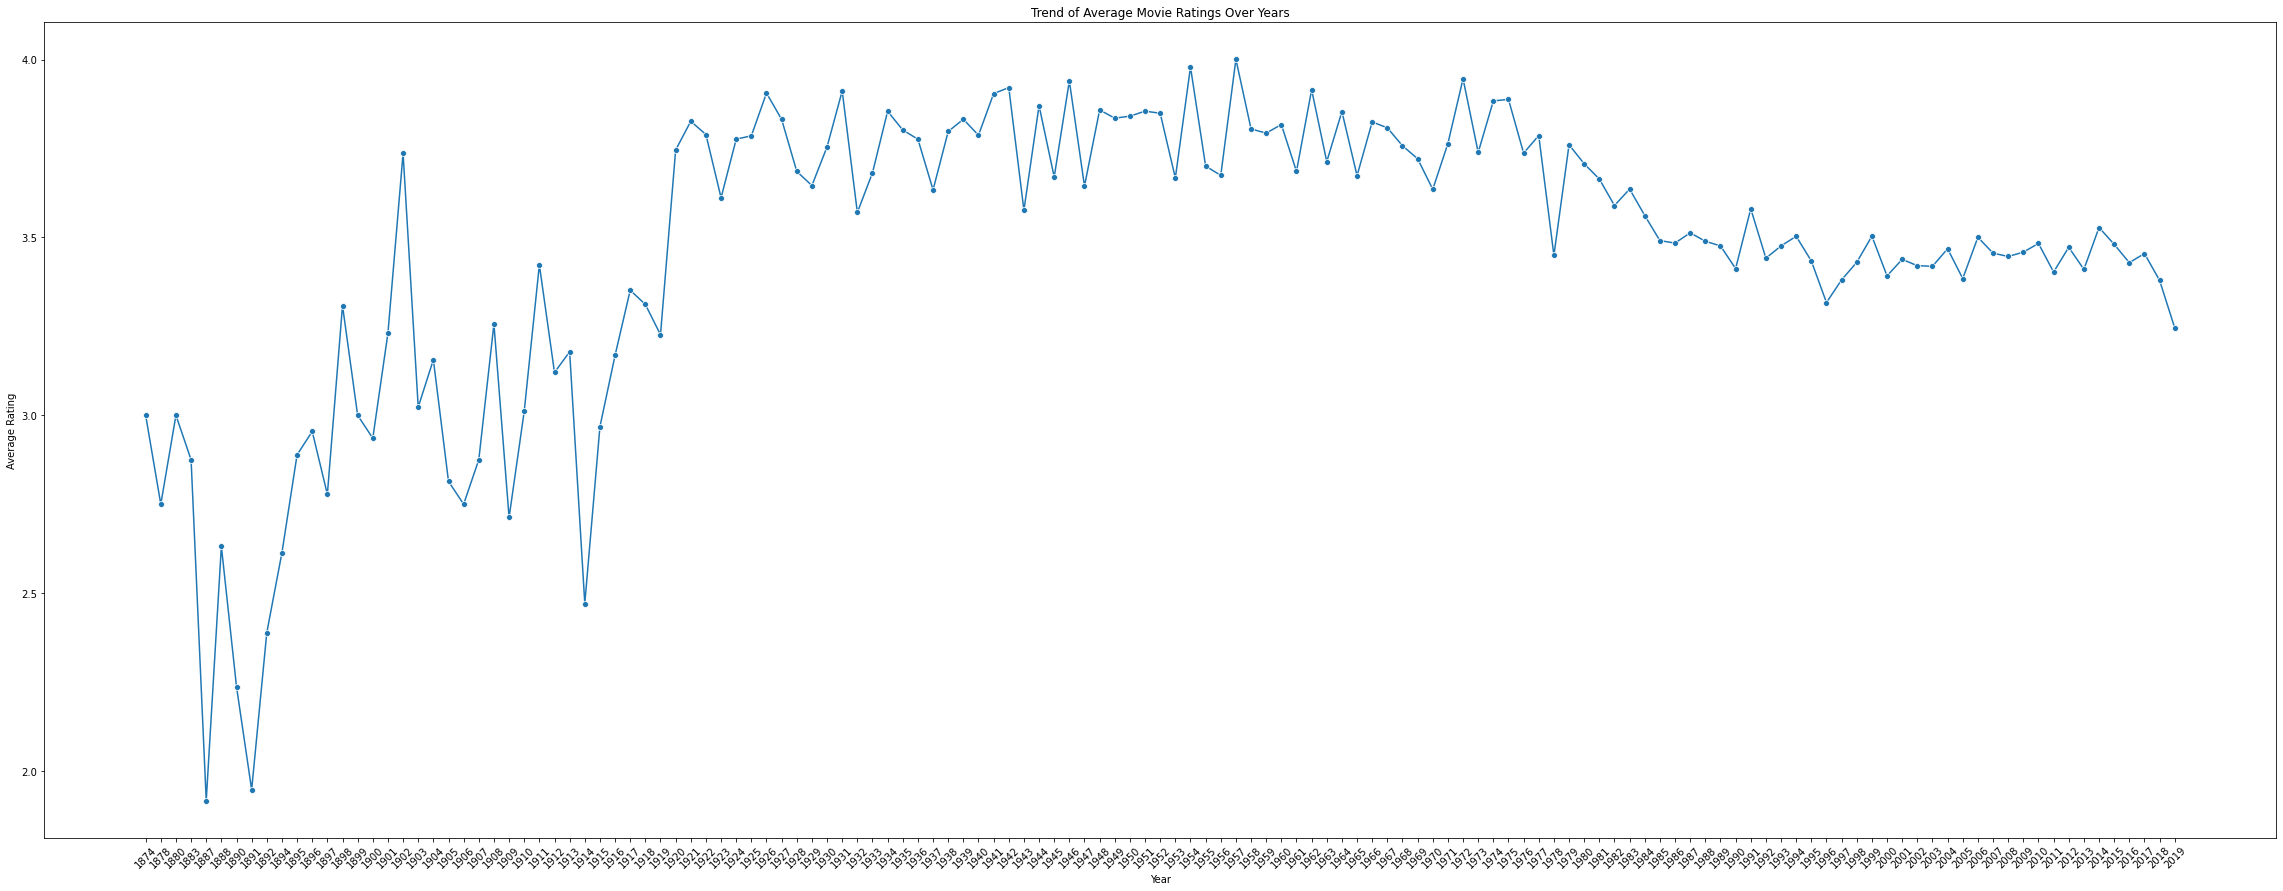

In [40]:
# Grouping by year and calculating average rating
yearly_avg_rating = vis_df.groupby('year')['rating'].mean()
plt.figure(figsize=(40, 15))
sns.lineplot(x=yearly_avg_rating.index, y=yearly_avg_rating.values, marker='o')
plt.title('Trend of Average Movie Ratings Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

**Insight**: 
The line graph illustrates fluctuations in the average movie ratings over the years, indicating variability in movie reception or changes in rating tendencies over time.

##### 8) Distribution of Ratings per Year


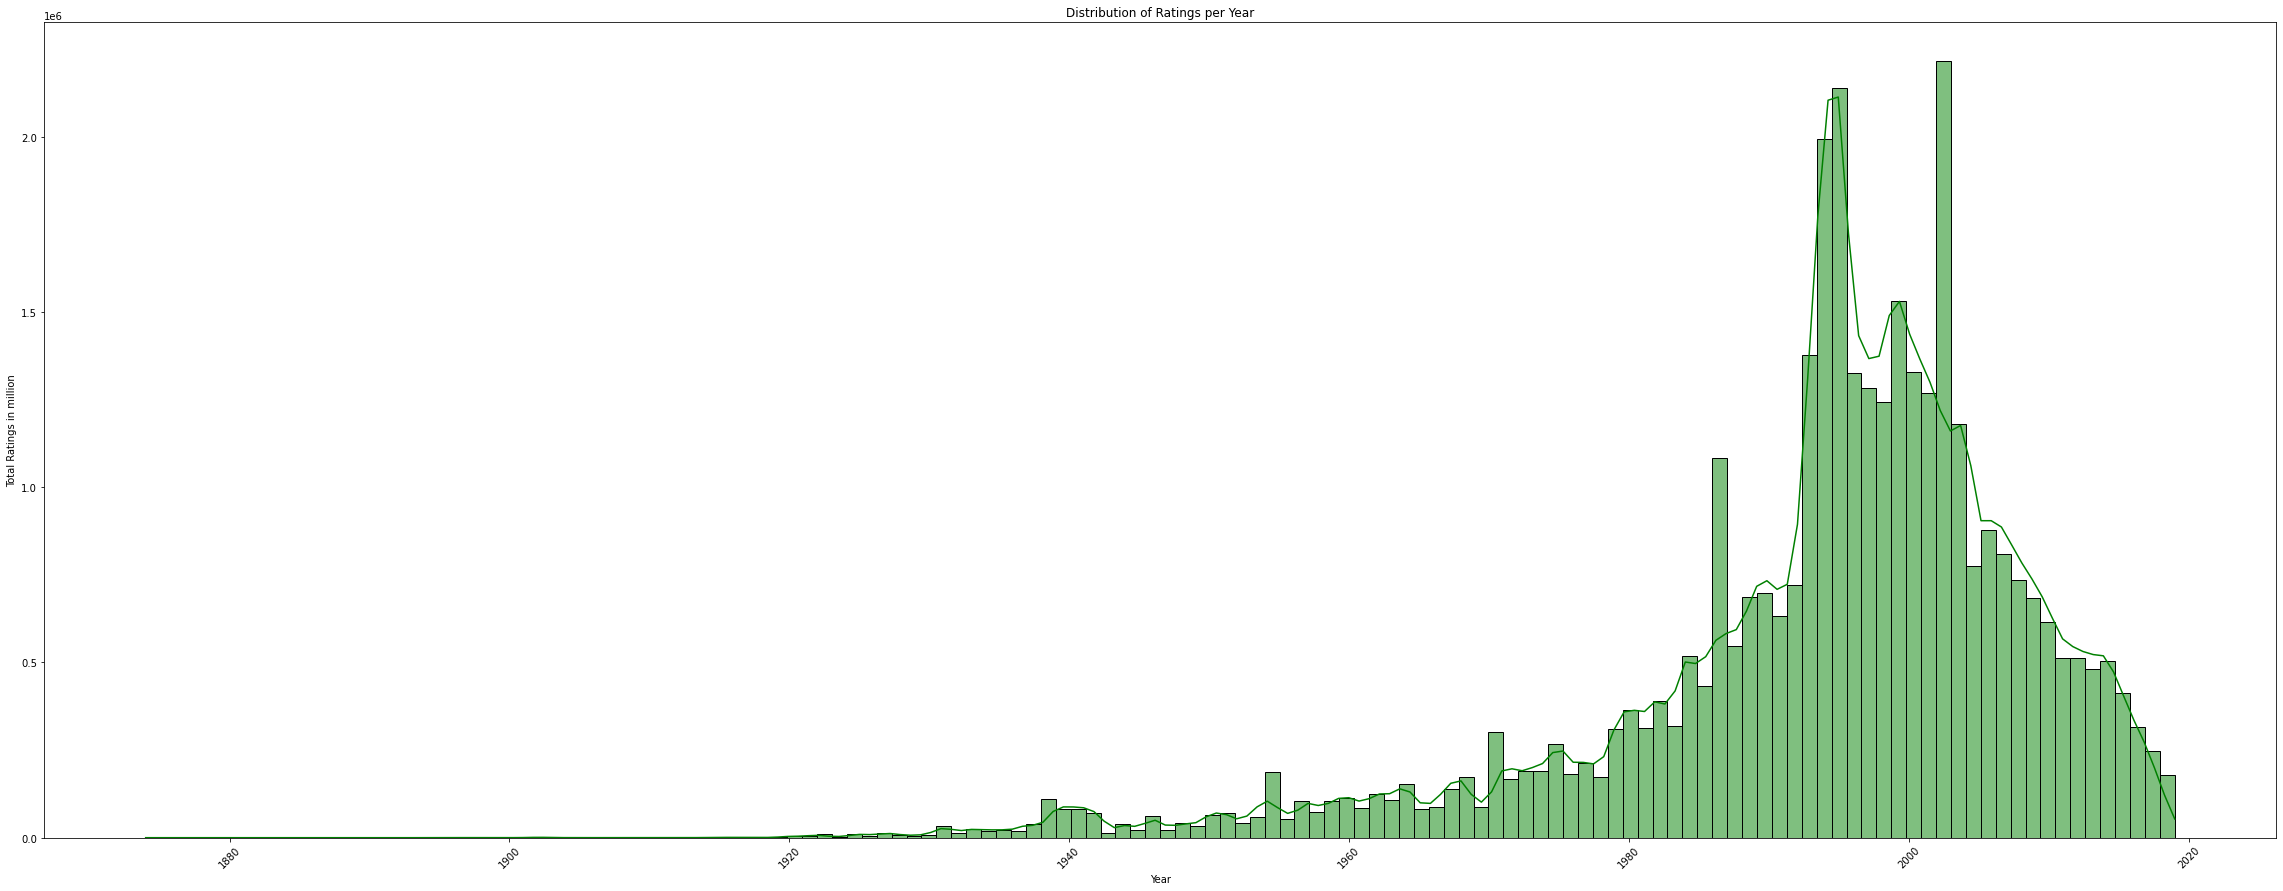

In [41]:
# Converting 'year' to numeric
vis_df['year'] = pd.to_numeric(vis_df['year'], errors='coerce')

# Reattempting the Distribution of Ratings per Year visualization
plt.figure(figsize=(40, 15))
sns.histplot(vis_df, x='year', weights='rating', bins=len(vis_df['year'].unique()), kde=True, color='green')
plt.title('Distribution of Ratings per Year')
plt.xlabel('Year')
plt.ylabel('Total Ratings in million')
plt.xticks(rotation=45)
plt.show()

##### 9) User Rating Activity


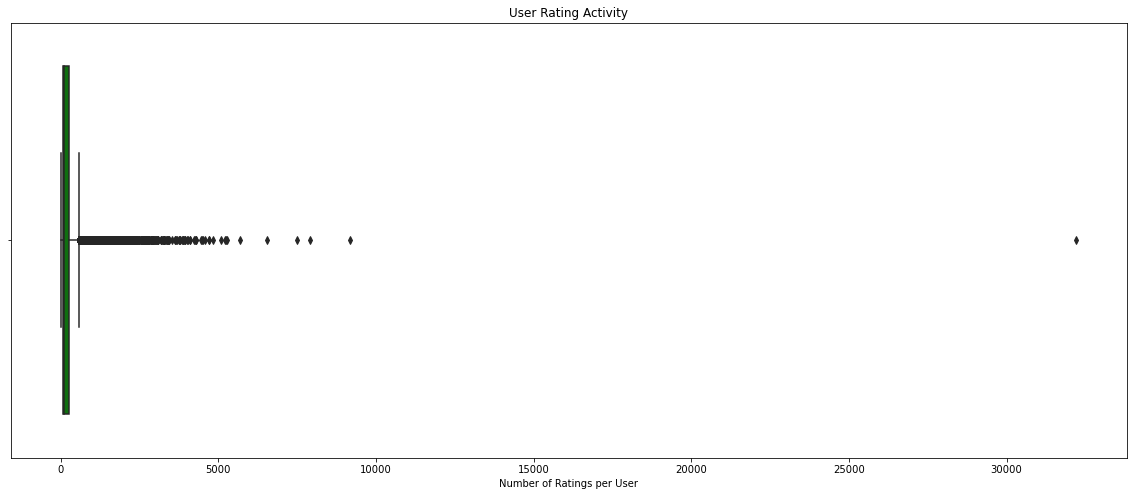

In [42]:
# Count the number of ratings per user
user_activity = vis_df['userId'].value_counts()

plt.figure(figsize=(20, 8))
sns.boxplot(x=user_activity, color='green')
plt.title('User Rating Activity')
plt.xlabel('Number of Ratings per User')
plt.show()

**Insight**:The boxplot indicates a wide range in the number of ratings per user, with a few users rating a very high number of movies, suggesting the presence of very active users in the dataset.

##### 10) Correlation Heatmap among Key Variables


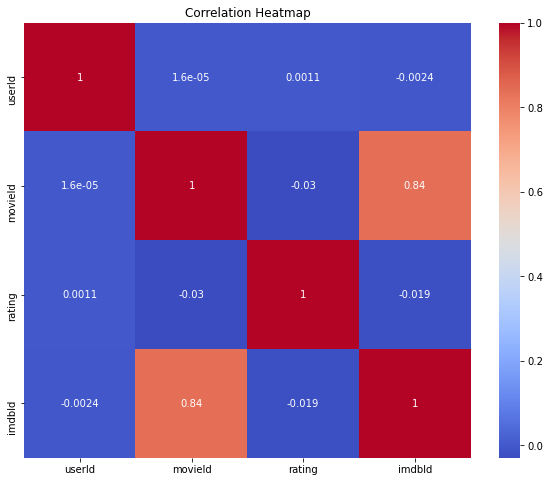

In [43]:
corr = vis_df[['userId', 'movieId', 'rating', 'imdbId']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insight**:The heatmap illustrates a strong positive correlation between movie IDs and their corresponding IMDb IDs, while other variables show little to no correlation

### Models Employed

## 1) Singular Value Decomposition (SVD) :

   SVD is a matrix factorization technique that decomposes a matrix into three other matrices. It is commonly used for recommendation systems to predict user preferences by learning latent features from user-item interactions. 

In [44]:
# Importing necessary libraries
from surprise import Dataset, Reader
from surprise import SVD, NMF, CoClustering, SlopeOne
from surprise.model_selection import train_test_split
from surprise import accuracy

# Defining the rating scale and creating the data object
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Splitting the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [45]:
# Initializing and training the SVD model with hyperparameters
modelSVD = SVD(n_factors=50, n_epochs=20, lr_all=0.005, reg_all=0.01, biased=True, verbose=True)

modelSVD.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [46]:
# Make predictions on the test set
predictionsSVD = modelSVD.test(testset)

In [47]:
# Calculate and print RMSE (Root Mean Squared Error) to evaluate the model
rmseSVD = accuracy.rmse(predictionsSVD)

RMSE: 0.7637


##### Item Based Recommendation

In [48]:
# # Specify the movie_id you like and want recommendations for
# movie_id = 123

# # Get the list of all unique movie IDs
# unique_movie_ids = df['movieId'].unique()

# # Initialize a list to store movie recommendations
# movie_recommendations = []

# # Iterate over each unique movie ID
# for other_movie_id in unique_movie_ids:
#     # Skip the movie you already like (movie_id)
#     if other_movie_id == movie_id:
#         continue
    
#     # Predict how much you might like other_movie_id based on your liking for movie_id
#     predicted_rating = model.predict(movie_id, other_movie_id).est
#     movie_recommendations.append((other_movie_id, predicted_rating))

# # Sort the recommendations by predicted rating in descending order
# movie_recommendations.sort(key=lambda x: x[1], reverse=True)

# # Get the top N recommended movie IDs
# top_n = 10
# top_recommendations = movie_recommendations[:top_n]

# # Get the name and genre of the movie you like (movie_id)
# movie_name_123 = df[df['movieId'] == movie_id]['title'].values[0]

# # Print the top N recommended movie titles and genres along with the movie you like
# print(f"Top {top_n} movie recommendations for '{movie_name_123}'")
# for recommended_movie_id, predicted_rating in top_recommendations:
#     movie_info = df[df['movieId'] == recommended_movie_id][['title', 'genres']].iloc[0]
#     genres = movie_info['genres']
#     # Join genres if they are in a list
#     if isinstance(genres, list):
#         genres = ', '.join(genres)
#     print(f"Title: {movie_info['title']}, Genre: {genres}")

##### Generating User-Based Recommendations with SVD


 The function get_recommendations_user_SVD predicts ratings for movies not yet rated by a specific user and returns the top recommendations. This personalizes the user experience by suggesting content that aligns with their preferences.

In [49]:
#Function to Generate Recommendations:
def get_recommendations_user_SVD(user_id, model, all_movies_df, user_movie_ratings_df, top_n=10):
    # Get a list of all movie IDs
    all_movie_ids = set(all_movies_df['movieId'].unique())
    
    # Get a list of movies that the user has already rated
    rated_movies = set(user_movie_ratings_df[user_movie_ratings_df['userId'] == user_id]['movieId'].unique())
    
    # Predict ratings for all movies that the user hasn't rated
    predictions = [model.predict(user_id, movie_id) for movie_id in all_movie_ids if movie_id not in rated_movies]
    
    # Retrieve the top N movies with the highest estimated ratings
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_recommendations = predictions[:top_n]
    
    # Prepare DataFrame for top recommended movies
    recommended_movies_info = []
    for pred in top_recommendations:
        movie_id = pred.iid
        movie_details = all_movies_df[all_movies_df['movieId'] == movie_id]
        title = movie_details['title'].values[0]
        year = movie_details['year'].values[0]
        genres = movie_details['genres'].values[0]
        imdbId = movie_details['imdbId'].values[0]
        predicted_rating = pred.est
        recommended_movies_info.append([movie_id, title, year, genres, imdbId, predicted_rating])
    return pd.DataFrame(recommended_movies_info, columns=['Movie ID', 'Title', 'Year', 'Genres', 'IMDb ID', 'Predicted Rating'])

In [50]:
# Generating recommendations for a specific user
user_id = 1
recommended_movies_1 = get_recommendations_user_SVD(user_id, modelSVD, df, df, top_n=10)
recommended_movies_1

,Movie ID,Title,Year,Genres,IMDb ID,Predicted Rating
0,171011,Planet Earth II,2016,Documentary,5491994,4.505091
1,608,Fargo,1996,"Comedy,Crime,Drama,Thriller",116282,4.492862
2,2360,"Celebration, The (Festen)",1998,Drama,154420,4.464054
3,50,"Usual Suspects, The",1995,"Crime,Mystery,Thriller",114814,4.456375
4,202439,Parasite,2019,"Comedy,Drama",6751668,4.435477
5,182723,Cosmos: A Spacetime Odissey,NaN,(no genres listed),2395695,4.405659
6,858,"Godfather, The",1972,"Crime,Drama",68646,4.398595
7,8484,"Human Condition I, The (Ningen no joken I)",1959,"Drama,War",53114,4.383309
8,2997,Being John Malkovich,1999,"Comedy,Drama,Fantasy",120601,4.378099
9,142115,The Blue Planet,2001,Documentary,296310,4.366840


Verifying if the user really hasn't watched the recommended movies.

In [51]:
# Get the list of movies already rated by the user
rated_movies_by_user = set(df[df['userId'] == user_id]['movieId'].unique())

# Get the list of recommended movie IDs
recommended_movie_ids = set(recommended_movies_1['Movie ID'])

# Check if any recommended movie has already been rated by the user
already_watched = recommended_movie_ids.intersection(rated_movies_by_user)

# Filter out already watched movies from the recommendations
final_recommendations = recommended_movies_1[~recommended_movies_1['Movie ID'].isin(already_watched)]

# Display the final recommendations
final_recommendations

,Movie ID,Title,Year,Genres,IMDb ID,Predicted Rating
0,171011,Planet Earth II,2016,Documentary,5491994,4.505091
1,608,Fargo,1996,"Comedy,Crime,Drama,Thriller",116282,4.492862
2,2360,"Celebration, The (Festen)",1998,Drama,154420,4.464054
3,50,"Usual Suspects, The",1995,"Crime,Mystery,Thriller",114814,4.456375
4,202439,Parasite,2019,"Comedy,Drama",6751668,4.435477
5,182723,Cosmos: A Spacetime Odissey,NaN,(no genres listed),2395695,4.405659
6,858,"Godfather, The",1972,"Crime,Drama",68646,4.398595
7,8484,"Human Condition I, The (Ningen no joken I)",1959,"Drama,War",53114,4.383309
8,2997,Being John Malkovich,1999,"Comedy,Drama,Fantasy",120601,4.378099
9,142115,The Blue Planet,2001,Documentary,296310,4.366840


## 2) Non-negative Matrix Factorization (NMF)
NMF is another matrix factorization method where all three matrices have non-negative values. It's useful for interpretability since it results in a parts-based representation of the data. 

#### Creating the NMF Model:

In [52]:
# Initializing and training the NMF model
nmf_model = NMF(n_factors=30, n_epochs=20, biased=True, verbose=True)
nmf_model.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [53]:
# Testing the model to predict on the test set and calculating RMSE
predictions_nmf = nmf_model.test(testset)
rmse_nmf = accuracy.rmse(predictions_nmf)

RMSE: 1.1196


##### Generating User-Based Recommendations with NMF

In [54]:
def get_recommendations_user_NMF(user_id, model, all_movies_df, user_movie_ratings_df, top_n=10):
    # Get a list of all movie IDs
    all_movie_ids = set(all_movies_df['movieId'].unique())

    # Get a list of movies that the user has already rated
    rated_movies = set(user_movie_ratings_df[user_movie_ratings_df['userId'] == user_id]['movieId'].unique())
    print("Rated movies count:", len(rated_movies))  # Debugging print

    # Predict ratings for all movies that the user hasn't rated
    unrated_movies = all_movie_ids - rated_movies
    print("Unrated movies count:", len(unrated_movies))  # Debugging print

    predictions = [model.predict(user_id, movie_id) for movie_id in unrated_movies]

    # Sort the predictions by estimated rating in descending order and retrieve the top N
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_recommendations = predictions[:top_n]

    # Create a DataFrame for the top recommended movies
    recommended_movies_info = []
    for pred in top_recommendations:
        movie_id = pred.iid
        movie_details = all_movies_df[all_movies_df['movieId'] == movie_id]
        title = movie_details['title'].values[0]
        year = movie_details['year'].values[0]
        genres = movie_details['genres'].values[0]
        imdbId = movie_details['imdbId'].values[0]
        predicted_rating = pred.est
        recommended_movies_info.append([movie_id, title, year, genres, imdbId, predicted_rating])

    return pd.DataFrame(recommended_movies_info, columns=['Movie ID', 'Title', 'Year', 'Genres', 'IMDb ID', 'Predicted Rating'])

In [55]:
# Generating recommendations for a specific user
user_id = 1
recommended_movies_nmf = get_recommendations_user_NMF(user_id, nmf_model, df, df, top_n=10)
recommended_movies_nmf

Rated movies count: 70
Unrated movies count: 52648


,Movie ID,Title,Year,Genres,IMDb ID,Predicted Rating
0,51,Guardian Angel,1994,"Action,Drama,Thriller",109950,5
1,136,From the Journals of Jean Seberg,1995,Documentary,113125,5
2,192,The Show,1995,Documentary,114435,5
3,201,Three Wishes,1995,"Drama,Fantasy",114663,5
4,206,Unzipped,1995,Documentary,114805,5
5,444,Even Cowgirls Get the Blues,1993,"Comedy,Romance",106834,5
6,574,Spanking the Monkey,1994,"Comedy,Drama",111252,5
7,625,Asfour Stah,1990,Drama,90665,5
8,701,Daens,1992,Drama,104046,5
9,723,Two Friends,1986,Drama,92123,5


## 3) CoClustering
Co-Clustering simultaneously clusters rows and columns of the matrix to discover checkboard-like structures. It's beneficial for datasets with multiple types of relationships.

##### Creating the Co-Clustering Model:

In [56]:
# Initializing and training the CoClustering model
co_clustering_model = CoClustering(n_cltr_u=2, n_cltr_i=2, n_epochs=20, random_state=42, verbose=1)

In [57]:
co_clustering_model.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [58]:
# Testing the model to predict on the test set and calculating RMSE
predictions_coc = co_clustering_model.test(testset)
rmse_coc = accuracy.rmse(predictions_coc)

RMSE: 0.8721


##### Generating User-Based Recommendations with Co-Clustering


In [59]:
def get_recommendations_user_CoClustering(user_id, model, all_movies_df, user_movie_ratings_df, top_n=10):
    # Get a list of all movie IDs
    all_movie_ids = set(all_movies_df['movieId'].unique())

    # Get a list of movies that the user has already rated
    rated_movies = set(user_movie_ratings_df[user_movie_ratings_df['userId'] == user_id]['movieId'].unique())

    # Predict ratings for all movies that the user hasn't rated
    predictions = [model.predict(user_id, movie_id) for movie_id in all_movie_ids if movie_id not in rated_movies]

    # Sort the predictions by estimated rating in descending order and retrieve the top N
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_recommendations = predictions[:top_n]

    # Create a DataFrame for the top recommended movies
    recommended_movies_info = []
    for pred in top_recommendations:
        movie_id = pred.iid
        movie_details = all_movies_df[all_movies_df['movieId'] == movie_id]
        title = movie_details['title'].values[0]
        year = movie_details['year'].values[0] if 'year' in movie_details.columns else "N/A"
        genres = movie_details['genres'].values[0] if 'genres' in movie_details.columns else "N/A"
        imdbId = movie_details['imdbId'].values[0] if 'imdbId' in movie_details.columns else "N/A"
        predicted_rating = pred.est
        recommended_movies_info.append([movie_id, title, year, genres, imdbId, predicted_rating])

    return pd.DataFrame(recommended_movies_info, columns=['Movie ID', 'Title', 'Year', 'Genres', 'IMDb ID', 'Predicted Rating'])

In [60]:
# Generating recommendations for a specific user
user_id = 1 
recommended_movies_coc = get_recommendations_user_CoClustering(user_id, co_clustering_model, df, df, top_n=10)
recommended_movies_coc

,Movie ID,Title,Year,Genres,IMDb ID,Predicted Rating
0,135727,Aarya,2004,"Comedy,Drama,Romance",431619,5
1,138504,Provocateur,1998,"Action,Drama,Thriller",134912,5
2,138568,Top of the World,1998,"Action,Drama,Thriller",120353,5
3,131767,Boxers and Ballerinas,2005,(no genres listed),435609,5
4,138696,Hands in the Air,2010,"Comedy,Drama,Romance",1634334,5
5,139185,A Girl Called Jules,1970,Drama,66277,5
6,139547,Placebo: Soulmates Never Die: Live in Paris 2003,2004,(no genres listed),417053,5
7,139693,Saint Maybe,1998,(no genres listed),168156,5
8,132124,Say Nothing,2001,"Action,Drama,Mystery,Romance,Sci-Fi,Thriller",288808,5
9,140633,Another World,2014,Documentary,3326110,5


## 4) SlopeOne
Slope One is a straightforward algorithm for collaborative filtering with interpretability. It's designed to be easy to implement and to work with sparse datasets. 

##### Creating the SlopeOne Model:



In [61]:
# Initializing and training the SlopeOne model
slope_one_model = SlopeOne()
slope_one_model.fit(trainset)

In [62]:
# Testing the model to predict on the test set and calculating RMSE
predictionsSlopeOne = slope_one_model.test(testset)
rmseSlopeOne = accuracy.rmse(predictionsSlopeOne)

RMSE: 0.8325


##### Generating User-Based Recommendations with SlopeOne


In [63]:
def get_recommendations_user_SlopeOne(user_id, model, all_movies_df, user_movie_ratings_df, top_n=10):
    # Get a list of all movie IDs
    all_movie_ids = set(all_movies_df['movieId'].unique())

    # Get a list of movies that the user has already rated
    rated_movies = set(user_movie_ratings_df[user_movie_ratings_df['userId'] == user_id]['movieId'].unique())

    # Predict ratings for all movies that the user hasn't rated
    predictions = [model.predict(user_id, movie_id) for movie_id in all_movie_ids if movie_id not in rated_movies]

    # Sort the predictions by estimated rating in descending order and retrieve the top N
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_recommendations = predictions[:top_n]

    # Create a DataFrame for the top recommended movies
    recommended_movies_info = []
    for pred in top_recommendations:
        movie_id = pred.iid
        movie_details = all_movies_df[all_movies_df['movieId'] == movie_id]
        title = movie_details['title'].values[0]
        year = movie_details['year'].values[0] if 'year' in movie_details.columns else "N/A"
        genres = movie_details['genres'].values[0] if 'genres' in movie_details.columns else "N/A"
        imdbId = movie_details['imdbId'].values[0] if 'imdbId' in movie_details.columns else "N/A"
        predicted_rating = pred.est
        recommended_movies_info.append([movie_id, title, year, genres, imdbId, predicted_rating])

    return pd.DataFrame(recommended_movies_info, columns=['Movie ID', 'Title', 'Year', 'Genres', 'IMDb ID', 'Predicted Rating'])

In [64]:
# Example usage: Get top 10 recommendations for a user with ID 1
user_id = 1  # Replace with the user ID for whom you want recommendations
recommended_movies_slope_one = get_recommendations_user_SlopeOne(user_id, slope_one_model, df, df, top_n=10)
recommended_movies_slope_one

,Movie ID,Title,Year,Genres,IMDb ID,Predicted Rating
0,131644,The Great American Girl Robbery,1979,"Comedy,Crime",78960,5
1,132944,Night Monster,1942,"Children,Drama,Horror",35124,5
2,137688,Escape Clause,1996,Thriller,116224,5
3,138422,The Devil's Violinist,2013,Drama,2401715,5
4,138504,Provocateur,1998,"Action,Drama,Thriller",134912,5
5,131767,Boxers and Ballerinas,2005,(no genres listed),435609,5
6,138692,Neshoba,2010,Documentary,1337155,5
7,139036,World Gone Wild,1988,"Action,Sci-Fi",96465,5
8,139185,A Girl Called Jules,1970,Drama,66277,5
9,139223,Walkout,2006,Drama,452703,5


## 5) Neural Networks

#### Model Overview:
Neural Networks provide a more flexible approach to modeling complex relationships within the data. In this approach, user and movie data are transformed into dense vectors, which are then combined to predict ratings.

In [65]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##### Preprocessing and Encoding User and Movie IDs:



In [66]:
# LabelEncoder is used to transform non-sequential IDs into sequential integer IDs for embedding layers.
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()

# Transforming userId and movieId to sequential integers
df['userId'] = user_encoder.fit_transform(df['userId'])
df['movieId'] = movie_encoder.fit_transform(df['movieId'])

<ipython-input-66-da2851efe4b3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['userId'] = user_encoder.fit_transform(df['userId'])
<ipython-input-66-da2851efe4b3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movieId'] = movie_encoder.fit_transform(df['movieId'])


In [67]:
# The data is split into training and test sets to evaluate the model's performance.
X = df[['userId', 'movieId']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Defining the Neural Network Architecture:

In [68]:
from tensorflow.keras.layers import BatchNormalization, Dropout

# Model architecture
user_input = Input(shape=(1,), name='user_input')
movie_input = Input(shape=(1,), name='movie_input')

user_embedding = Embedding(input_dim=len(user_encoder.classes_), output_dim=50)(user_input)
movie_embedding = Embedding(input_dim=len(movie_encoder.classes_), output_dim=50)(movie_input)

user_vec = Flatten()(user_embedding)
movie_vec = Flatten()(movie_embedding)

concat = Concatenate()([user_vec, movie_vec])

# Adding more layers and units, and using Batch Normalization and Dropout for regularization
dense1 = Dense(512, activation='relu')(concat)
batch_norm1 = BatchNormalization()(dense1)
dropout1 = Dropout(0.5)(batch_norm1)

dense2 = Dense(256, activation='relu')(dropout1)
batch_norm2 = BatchNormalization()(dense2)
dropout2 = Dropout(0.5)(batch_norm2)

output = Dense(1)(dropout2)

modelNN = Model(inputs=[user_input, movie_input], outputs=output)

modelNN.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        2250000     user_input[0][0]                 
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        2635900     movie_input[0][0]                
______________________________________________________________________________________________

In [69]:
# Compile the model with the RMSprop optimizer
modelNN.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mean_squared_error')

In [70]:
# Train the model
modelNN.fit([X_train['userId'], X_train['movieId']], y_train, epochs=20, batch_size=5000, validation_split=0.2, verbose=1)

Epoch 1/20
1319/1319 [==============================] - 144s 109ms/step - loss: 1.6213 - val_loss: 0.7352
Epoch 2/20
1319/1319 [==============================] - 144s 109ms/step - loss: 0.7147 - val_loss: 0.6700
Epoch 3/20
1319/1319 [==============================] - 144s 109ms/step - loss: 0.6824 - val_loss: 0.6563
Epoch 4/20
1319/1319 [==============================] - 145s 110ms/step - loss: 0.6635 - val_loss: 0.6448
Epoch 5/20
1319/1319 [==============================] - 144s 109ms/step - loss: 0.6469 - val_loss: 0.6470
Epoch 6/20
1319/1319 [==============================] - 148s 112ms/step - loss: 0.6267 - val_loss: 0.6263
Epoch 7/20
1319/1319 [==============================] - 144s 109ms/step - loss: 0.6088 - val_loss: 0.6147
Epoch 8/20
1319/1319 [==============================] - 143s 108ms/step - loss: 0.5948 - val_loss: 0.6113
Epoch 9/20
1319/1319 [==============================] - 136s 103ms/step - loss: 0.5818 - val_loss: 0.6076
Epoch 10/20
1319/1319 [=======================

In [71]:
# Evaluate the model to get MSE and then compute RMSE
mse_loss = modelNN.evaluate([X_test['userId'], X_test['movieId']], y_test)
rmse_lossNN = np.sqrt(mse_loss)
print('RMSE:', rmse_lossNN)

64376/64376 [==============================] - 71s 1ms/step - loss: 0.5850
RMSE: 0.7648584849542631


##### Generating User-Based Recommendations:

In [72]:
def recommend_movies_for_user_NN_df(model, user_id, all_movie_ids, user_rated_movies, movies_df, top_n=10):
    # Movies not rated by the user
    movies_to_predict = np.setdiff1d(all_movie_ids, user_rated_movies)

    # Prepare the user data for prediction
    user_data = np.array([user_id] * len(movies_to_predict))

    # Predict ratings
    predicted_ratings = model.predict([user_data, movies_to_predict]).flatten()

    # Get the top N movie IDs with the highest predicted rating
    top_movie_indices = predicted_ratings.argsort()[-top_n:][::-1]
    top_movie_ids = movies_to_predict[top_movie_indices]

    # Get unique movie details for the top recommended movies
    recommended_movies = movies_df.drop_duplicates(subset='movieId')
    recommended_movies = recommended_movies[recommended_movies['movieId'].isin(top_movie_ids)]

    # Sort the recommendations to match the order of top_movie_ids
    recommended_movies = recommended_movies.set_index('movieId')
    recommended_movies = recommended_movies.loc[top_movie_ids].reset_index()

    # Adding predicted ratings
    recommended_movies['Predicted Rating'] = predicted_ratings[top_movie_indices]

    # Correct the column names in the return statement to match the DataFrame
    return recommended_movies[['movieId', 'title', 'year', 'genres', 'imdbId', 'Predicted Rating']]

In [73]:
# Generating recommendations for a specific user
user_id = 1
all_movie_ids = df['movieId'].unique()
user_rated_movies = df[df['userId'] == user_id]['movieId'].unique()
recommended_movies_NN_df = recommend_movies_for_user_NN_df(modelNN, user_id, all_movie_ids, user_rated_movies, df, top_n=10)
recommended_movies_NN_df

,movieId,title,year,genres,imdbId,Predicted Rating
0,39744,Planet Earth II,2016,Documentary,5491994,4.764487
1,30001,The Blue Planet,2001,Documentary,296310,4.703921
2,734,Dr. Strangelove or: How I Learned to Stop Worr...,1964,"Comedy,War",57012,4.669900
3,49794,Twin Peaks,1989,"Drama,Mystery",278784,4.669847
4,37116,Over the Garden Wall,2013,"Adventure,Animation,Drama",3718778,4.637286
5,35771,Planet Earth,2006,Documentary,795176,4.623449
6,1169,Brazil,1985,"Fantasy,Sci-Fi",88846,4.590383
7,2750,"Black Cat, White Cat (Crna macka, beli macor)",1998,"Comedy,Romance",118843,4.570890
8,17642,"Civil War, The",1990,"Documentary,War",98769,4.570656
9,21086,Powers of Ten,1977,Documentary,78106,4.562037


The Neural Network model allows for complex interactions between user and item features, potentially leading to more accurate predictions and personalized recommendations. The use of dropout and batch normalization helps prevent overfitting during training, ensuring the model generalizes well to unseen data.

## Model Performance Comparison Using RMSE


The RMSE is a standard measure to evaluate the accuracy of predictions in recommendation systems, where a lower RMSE value indicates better predictive performance. This visualization aids in understanding the comparative performance of each model, with the bar heights directly representing the RMSE values.

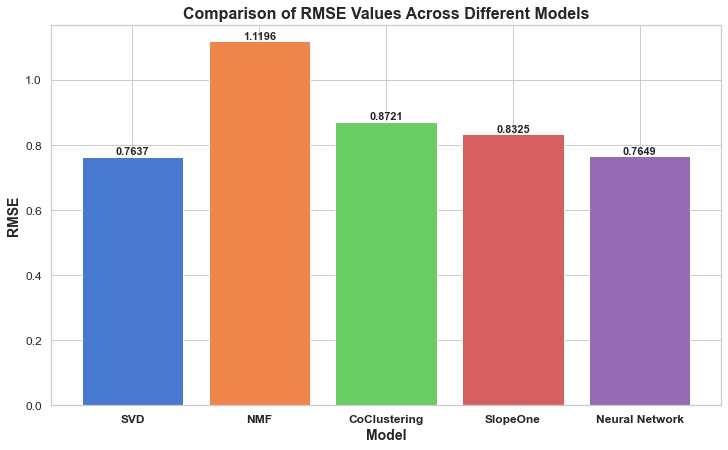

In [74]:
import seaborn as sns

# RMSE values for each model
rmse_values = {
    "SVD": rmseSVD,
    "NMF": rmse_nmf,
    "CoClustering": rmse_coc,
    "SlopeOne": rmseSlopeOne,
    "Neural Network": rmse_lossNN
}

# Enhancing the plot aesthetics using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))
bars = plt.bar(rmse_values.keys(), rmse_values.values(), color=sns.color_palette("muted"))

# Adding the RMSE scores on top of each bar without rounding
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"{yval:.4f}", ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customizing the plot
plt.xlabel('Model', fontsize=14, fontweight='bold')
plt.ylabel('RMSE', fontsize=14, fontweight='bold')
plt.title('Comparison of RMSE Values Across Different Models', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.ylim(0, max(rmse_values.values()) + 0.05)  # Adjusting y-axis limit for clarity
plt.show()

# Model Performance Comparison

The bar chart illustrates the comparison of RMSE (Root Mean Squared Error) values across five different models used in a movie recommendation system:

- **SVD (Singular Value Decomposition):** With an RMSE of `0.7637`, the SVD model shows strong predictive accuracy and is effective in uncovering latent features that influence user preferences.

- **NMF (Non-negative Matrix Factorization):** Exhibiting a higher RMSE of `1.1196`, the NMF model has less predictive accuracy. Although it provides interpretable results, it may benefit from parameter tuning or further data processing to improve its performance.

- **CoClustering:** This model achieves a moderate RMSE of `0.8721`, suggesting decent performance by grouping similar users and items. However, its predictive accuracy falls short compared to SVD.

- **SlopeOne:** With an RMSE of `0.8325`, the SlopeOne recommender is simple yet effective, though it does not achieve the best performance among the models tested.

- **Neural Network:** Outshining the other models with the lowest RMSE of `0.7649`, the neural network model's complex architecture successfully captures the complex nonlinear relationships in the data.

In summary, both SVD and Neural Network models demonstrate comparable high-level accuracy, as indicated by their close RMSE values. These models excel in capturing the nuances of user preferences and intricate movie features better than other evaluated models. While the sophistication of neural networks offers a slight edge, the simplicity and efficiency of SVD make it equally valuable, especially when considering computational resources and the ease of model interpretation.

#### Saving Neural Networks model for the application

In [75]:
# Save the model
modelNN.save('movie_recommender_model.h5')